In [1]:
import timm
from fastai.vision.all import *
import fastai.vision.learner # need to do these steps to initialise tim inside fastai
fastai.vision.learner.timm = timm

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(192))

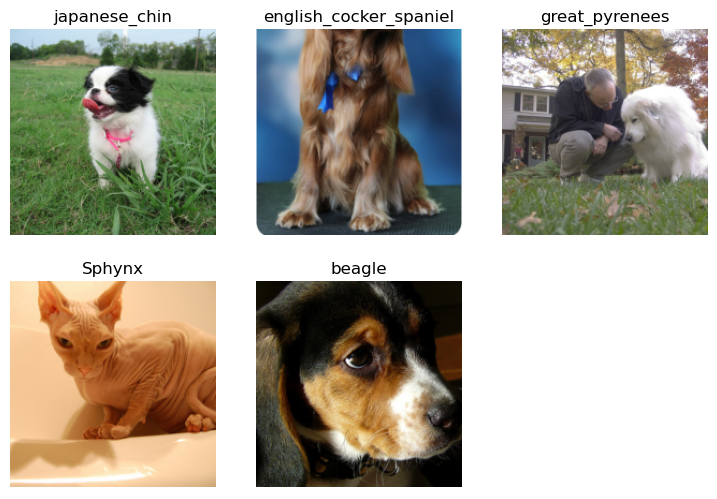

In [4]:
dls.show_batch(max_n=5)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.655681,0.462271,0.151556,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.580973,0.356962,0.126522,00:31
1,0.354212,0.290029,0.098782,00:31
2,0.200627,0.275288,0.090663,00:31


In [6]:
timm.list_models("convnext*") # take what model you want and put it as a string in the learner

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
learn2 = vision_learner(dls, "convnextv2_pico", metrics=error_rate).to_fp16()
learn2.fine_tune(3)

/home/anubhav-auth/miniconda3/envs/ml_env/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/home/anubhav-auth/miniconda3/envs/ml_env/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,1.141972,0.343377,0.113667,01:50


epoch,train_loss,valid_loss,error_rate,time
0,0.355137,0.259700,0.087280,02:37
1,0.235614,0.206901,0.064276,02:37
2,0.132519,0.191393,0.060893,02:37


In [7]:
learn2.export("pet_classifier.pkl")